In [1]:
# To get output of all statements without print()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Data\data_hackathon.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


### Data Cleaning

### Check the null values

In [7]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
df[df.x1.isnull()]
df[df.x2.isnull()]

,x1,x2,y
36,NaN,116.138522,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1318,NaN,53.182191,0


,x1,x2,y
44,-99.627522,NaN,1
1092,55.162258,NaN,0
1430,-74.126054,NaN,0


In [9]:
df=df.dropna()

In [10]:
df.isna().sum()
df.reset_index(inplace=True)

x1    0
x2    0
y     0
dtype: int64

In [11]:
df.drop('index', axis=1, inplace=True)

In [12]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


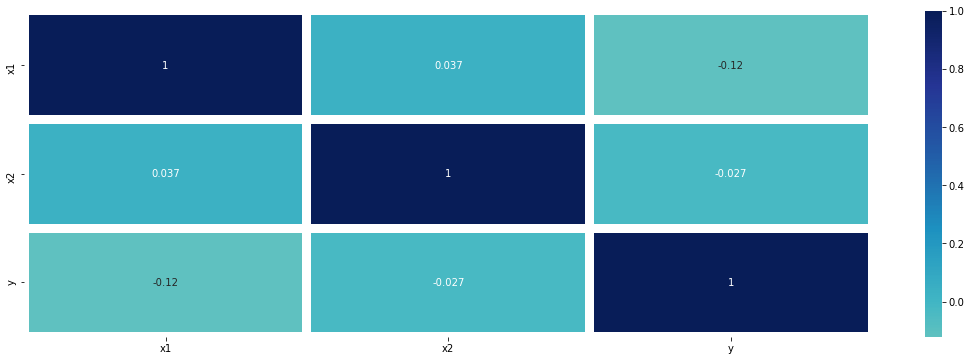

In [13]:
#To find the correlation of all features
plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0, cmap="YlGnBu");

C:\Users\T.Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1'>

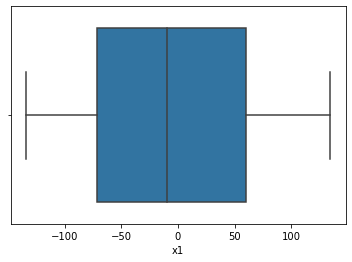

In [16]:
sns.boxplot(df.x1)

In [18]:
q1 = df['x2'].quantile(0.25)
# Q3
q3 = df['x2'].quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper
lower
q1
q3
IQR

280.1506946225

-296.5058689975

-80.25965764

63.904483264999996

144.164140905

C:\Users\T.Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

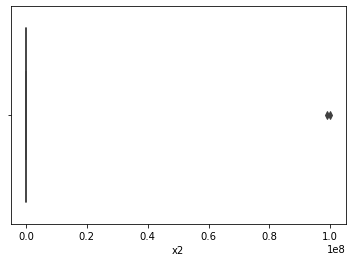

In [19]:
sns.boxplot(df.x2)

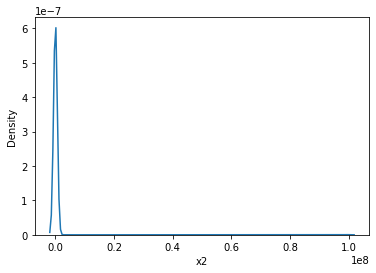

In [20]:
sns.kdeplot(df.x2);

In [22]:
from scipy import stats

((array([-3.42068308, -3.17156498, -3.03349863, ...,  3.03349863,
          3.17156498,  3.42068308]),
  array([-1.34876132e+02, -1.34631502e+02, -1.34419394e+02, ...,
          1.34929748e+02,  9.90099980e+07,  9.99999990e+07])),
 (296559.50080057036, 89677.81673315329, 0.09917972630219259))

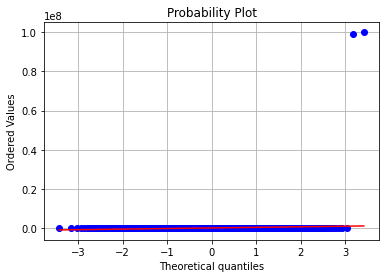

In [23]:
stats.probplot(df['x2'], dist="norm", plot=plt)

plt.grid()

In [26]:
target = df['y']
data = df.drop("y",axis=1)

In [27]:
print(data.shape)
print(target.shape)

(2219, 2)
(2219,)


In [28]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(2219, 2)


In [29]:
standardized_data

array([[-1.52953452e+00, -2.99941733e-02],
       [-1.28583072e+00, -2.99999411e-02],
       [-1.67518040e+00, -2.99969302e-02],
       ...,
       [ 1.20720924e+00, -2.99979109e-02],
       [ 1.11758091e+00, -3.00063617e-02],
       [ 1.52687860e+00,  3.34595047e+01]])

## Data Preparation - Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, \
                                                   target, \
                                                   test_size = 0.25, \
                                                   random_state = 0)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [54]:
Classifiers = [
    LogisticRegression(),
    SVC(kernel='linear'),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

In [55]:
for classifier in Classifiers:
    model = classifier.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.6018018018018018
Accuracy of SVC is 0.554954954954955
Accuracy of SVC is 0.6018018018018018
Accuracy of DecisionTreeClassifier is 0.9297297297297298
Accuracy of KNeighborsClassifier is 0.527927927927928


### Hyperparameter Tuning

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2",'elasticnet']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.5727142805456058
